# Text Classification Using Naive Bayes
## Task is to:
### 1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
### 2. Implement Naive Bayes on your own from scratch for text classification. 
### 3. Compare Results of your implementation of Naive Bayes with one in Sklearn.

In [1]:
#importing Various required libraries
import numpy as np
import pandas as pd
import operator
import os
import sys
from sklearn import model_selection
import re
import string
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
#list stopwords contains are commonly used english words taken from intenet.
#Words in this list are common english words which should not affect our predictions
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

## Extracting Information from documents in 20_newsgroups

In [3]:
def extractInformation():
    """
        objective:To create two lists, one containing information of documents including filename and text present in it 
                    while other containing newsgroup category of corresponding to that document 
        Input:None
        return:Tuples containing
            X :Represents lists containing information of documents that contains in a tuple as (filename,text)
            Y :Represents lists containing newsgroup category of corresponding document
    """
    #X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
    #Y is the list of category
    X = [] # an element of X is represented as (filename,text)
    Y = [] # an element of Y represents the newsgroup category of the corresponding X element
    #Iterating over categories given in 20_newsgroups
    for category in os.listdir('C:/Users/Anisha/Desktop/20_newsgroups'):
        #Iterating over documents present in particular category
        for document in os.listdir('C:/Users/Anisha/Desktop/20_newsgroups/'+category):
            #opening each document 
            with open('C:/Users/Anisha/Desktop/20_newsgroups/'+category+'/'+document, "r") as f:
                #Extracting information from the opened document and storing it into the list X and Y
                X.append((document,f.read()))
                Y.append(category)
    return X,Y
X,Y=extractInformation()

## Analysing the data stored in X and Y

In [4]:
#printing dataType of list X and list Y in detail
print('Type of X: ',type(X))
print()
print('Type of X[0]: ',type(X[0]))
print()
print('Type of X[0][0]: ',type(X[0][0]))
print()
print('Type of X[0][1]: ',type(X[0][1]))
print()
print('Type of Y: ',type(Y))
print()
print('Type of Y[0]: ',type(Y[0]))

Type of X:  <class 'list'>

Type of X[0]:  <class 'tuple'>

Type of X[0][0]:  <class 'str'>

Type of X[0][1]:  <class 'str'>

Type of Y:  <class 'list'>

Type of Y[0]:  <class 'str'>


In [5]:
#printing first element of list X that represents a tuple with first element as name of document and second text of document in X 
print('X[0]: ',X[0])
print()
#printing first element of list Y that represents newsgroup category of corresponding X.
print('Y[0]: ',Y[0])

X[0]:  ('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: 

## Splitting X and Y to X_train,X_test,Y_train,Y_test

In [6]:
#splitting the data in training and testing
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y)
#split has done in with default test size 
print(len(X_train), len(X_test), len(Y_train), len(Y_test))

14997 5000 14997 5000


## Creating Dictionary of words vs frequency and Extracting top K words with maximum frequency

In [7]:
#using a string sample for extracting words using re.split
sample_text="Data Science & Machine Learning Course | 15 June’19"
sample_text=sample_text.lower()
print(re.split(r'\W+',sample_text))

['data', 'science', 'machine', 'learning', 'course', '15', 'june', '19']


In [8]:
#printing dataType of X_train,X_test,Y_train,Y_test 
print('Type of X_train: ',type(X_train))
print()
print('Type of X_test: ',type(X_test))
print()
print('Type ofY_train: ',type(Y_train))
print()
print('Type of Y_test: ',type(Y_test))

Type of X_train:  <class 'list'>

Type of X_test:  <class 'list'>

Type ofY_train:  <class 'list'>

Type of Y_test:  <class 'list'>


In [9]:
def dictWord(X_train):
    """
        objective:To create dictionary of words from the given documents with their corresponding frequency
        Input:
            X_train:List containing information of documents that contains in a tuple as (filename,text)
        return:
            vocab:Represents the dictionary of keys as words present in X_train(2nd element of tuple) 
                    and value as their corresponding frequency
    """
    #vocab represents the dictionary of keys as words present in X_train(2nd element of tuple) 
    #and value as their corresponding frequency
    vocab = {}
    for i in range(len(X_train)):
        #Took [1] because [0] is name of document(filename) and [1] is text in document
        word=X_train[i][1].lower()
        #splitting the text into words
        stripped=re.split(r'\W+',word)
        #Iterating over each word and updating the dictionary vocab
        for word in stripped:
            if (word.isalpha()) and (len(word)>2)  and (word not in stopwords): 
                #vocab[word]=vocab.get(word,0)+1
                if word in vocab:
                    vocab[word]+=1
                else:
                    vocab[word]=1
    return vocab
vocab=dictWord(X_train)

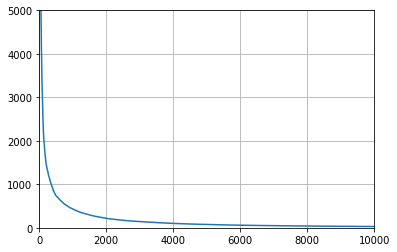

In [10]:
def plotGraph_sortedVocab(vocab):
    """
        objective:To create a sorted vocab dictionary using vocab dictionary by sorting it according to its values and plotting the graph for the same
        Input:
            vocab:Represents the dictionary of keys as words and value as their corresponding frequency
        return:
            sorted_vocab:Represents the dictionary, created using vocab dictionary which is sorted according to the values(frequeny of words)
    """ 
    #sorted_vocab represents vocab dictionary sorted according to word's frequency(value)
    sorted_vocab=[(i,vocab[i]) for i in sorted(vocab, key=vocab.get, reverse=True)]
    features=[]
    features_freq=[]
    #iterating over sorted vocab and updating list features and list features_freq
    for i in range(len(sorted_vocab)):
        features.append(i)
        features_freq.append(sorted_vocab[i][1])
    #plotting graph with x axis as number of words and y axis as its frequency
    #on basis of graph we can decide the number of features we can take
    plt.plot(features,features_freq)
    #x axis is in range 0-10000 and y axis is in range 0-5000
    plt.axis([0,10000,0,5000])
    #including grid lines
    plt.grid()
    #showing plot
    plt.show()
    return sorted_vocab
sorted_vocab=plotGraph_sortedVocab(vocab)

In [11]:
#printing sorted vocab
print(sorted_vocab)

[('edu', 123562), ('cmu', 39355), ('com', 37175), ('news', 25765), ('srv', 24270), ('cantaloupe', 19555), ('net', 19162), ('message', 16478), ('subject', 16240), ('lines', 15678), ('date', 15599), ('apr', 15474), ('path', 15290), ('newsgroups', 15285), ('organization', 14837), ('state', 14239), ('gmt', 13317), ('ohio', 12036), ('writes', 11009), ('article', 10048), ('comp', 9955), ('references', 9749), ('talk', 9215), ('misc', 8968), ('ans', 8316), ('howland', 8242), ('sender', 8236), ('reston', 8226), ('people', 7726), ('like', 7648), ('university', 7467), ('posting', 7319), ('nntp', 7021), ('mps', 6959), ('know', 6705), ('host', 6680), ('sci', 6622), ('zaphod', 6269), ('think', 6169), ('usenet', 6155), ('alt', 5933), ('politics', 5842), ('windows', 5605), ('time', 5300), ('rutgers', 5262), ('harvard', 5184), ('use', 5170), ('near', 5152), ('eng', 5128), ('new', 4992), ('rec', 4845), ('good', 4725), ('sei', 4696), ('crabapple', 4661), ('noc', 4646), ('xref', 4566), ('soc', 4564), ('da

In [12]:
#taking top 2000 words by default with max Frequency as our feature
#here feature list is top_k_words
def generate_top_k_Features(sorted_vocab,k=2000):
    """
        objective:To generate top 'k' features from sorted_vocab
        Input:
            sorted_vocab:Represents the updated vocab dictionary which is sorted according to the values(frequeny of words)
            k:integer,by default 2000
        return:
            top_k_words:Represents list of top 'k' words with max Frequency
    """
    top_k_words=[sorted_vocab[i][0] for i in range(k)]
    return top_k_words

#taking input from user for 'k'
k=input('Maximum Frequency of features: ')
if k=="":
    top_k_words=generate_top_k_Features(sorted_vocab)
else:
    top_k_words=generate_top_k_Features(sorted_vocab,int(k))
print(top_k_words)

Maximum Frequency of features: 2000
['edu', 'cmu', 'com', 'news', 'srv', 'cantaloupe', 'net', 'message', 'subject', 'lines', 'date', 'apr', 'path', 'newsgroups', 'organization', 'state', 'gmt', 'ohio', 'writes', 'article', 'comp', 'references', 'talk', 'misc', 'ans', 'howland', 'sender', 'reston', 'people', 'like', 'university', 'posting', 'nntp', 'mps', 'know', 'host', 'sci', 'zaphod', 'think', 'usenet', 'alt', 'politics', 'windows', 'time', 'rutgers', 'harvard', 'use', 'near', 'eng', 'new', 'rec', 'good', 'sei', 'crabapple', 'noc', 'xref', 'soc', 'das', 'cis', 'max', 'god', 'religion', 'europa', 'gtefsd', 'org', 'world', 'uunet', 'ece', 'way', 'say', 'make', 'christian', 'gov', 'rochester', 'right', 'distribution', 'club', 'andrew', 'mail', 'space', 'gatech', 'magnesium', 'want', 'reply', 'utexas', 'udel', 'used', 'culture', 'said', 'sys', 'sun', 'need', 'ibm', 'work', 'uiuc', 'really', 'nasa', 'computer', 'believe', 'sura', 'problem', 'hardware', 'graphics', 'netcom', 'usa', 'years'

## Generating Testing and Training Datasets

In [13]:
def generate_TrainDataset(X_train,top_k_words):
    """
        objective:To generate nD numpy array that contains of training data with rows as no. of documents 
                    and column as top k words
        Input:
            X_train:Represents list containing information of documents that contains in a tuple as (filename,text)
            top_k_words:represents list of top 'k' words with max Frequency
        return:
            X_train_dataset:Represents a nD numpy array that contains of training data
    """
    #No. of rows is equivalent to rows in X_train, and No. of column is equal to length of top_k_words(feature list)
    X_train_dataset=np.zeros([len(X_train),len(top_k_words)],int)
    for i in range(len(X_train)):
        words=re.split(r'\W+',X_train[i][1].lower())
        #iterating over each word
        for j in words:
            #adding the frequency corresponding to that word only which is in our top_k_words(feature list)
            if j in top_k_words:
                X_train_dataset[i][top_k_words.index(j)]+=1
    return X_train_dataset

def generate_TestDataset(X_test,top_k_words):
    """
        objective:To generate nD numpy array that contains of testing data with rows as no. of documents 
                    and column as top k words
        Input:
            X_test:Represents list containing information of documents that contains in a tuple as (filename,text)
            top_k_words:represents list of top 'k' words by default with max Frequency
        return:
            X_train_dataset:Represents a nD numpy array that contains of testing data
    """
    #No. of rows is equivalent to rows in X_test, and No. of column is equal to length of top_k_words(feature list)
    X_test_dataset=np.zeros([len(X_test),len(top_k_words)],int)
    for i in range(len(X_test)):
        words=re.split(r'\W+',X_test[i][1].lower())
        #iterating over each word
        for j in words:
            #adding the frequency corresponding to that word only which is in our top_k_words(feature list)
            if j in top_k_words:
                X_test_dataset[i][top_k_words.index(j)]+=1
    return X_test_dataset

X_train_dataset=generate_TrainDataset(X_train,top_k_words)
X_test_dataset=generate_TestDataset(X_test,top_k_words)
#printing X_train_dataset and X_test_dataset
print('X_train_dataset:-')
print(X_train_dataset)
print()
print('X_test_dataset:-')
print(X_test_dataset)

X_train_dataset:-
[[ 9  2  3 ...  0  0  0]
 [ 4  1  4 ...  0  0  0]
 [ 2  2  8 ...  0  0  0]
 ...
 [ 5  1  6 ...  0  0  0]
 [ 9  3  0 ...  0  0  0]
 [13  1  1 ...  0  0  0]]

X_test_dataset:-
[[ 9  4  0 ...  0  0  0]
 [ 7  4  7 ...  0  0  0]
 [10  3  8 ...  0  0  0]
 ...
 [ 2  1  7 ...  0  0  0]
 [17  3  0 ...  0  0  0]
 [ 3  1  0 ...  0  0  0]]


## 1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).

In [14]:
#Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Confusion Matrix for testing data :-")
print(confusion_matrix(Y_test,Y_test_pred))
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.8972461158898446
Sklearn's score on testing data : 0.859
Confusion Matrix for testing data :-
[[193   0   0   0   0   0   0   2   1   0   0   0   0   1   0   1   0   0
    0  35]
 [  0 200  12  21   4   8   3   2   0   1   0   0   0   2   0   0   0   0
    0   0]
 [  0   9 193  19   6  15   2   1   0   0   0   0   2   1   1   0   0   0
    0   0]
 [  0   1   3 199  29   0   5   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   0  25 204   0   5   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  17  19  12  11 169   2   0   2   1   0   1   3   1   2   0   0   0
    0   0]
 [  0   0   1   6   3   0 236   6   1   0   1   0   5   0   1   0   1   0
    0   0]
 [  0   0   0   1   1   0  11 248   2   1   1   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4 277   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   3   2 227  12   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0  

## 2. Implement Naive Bayes on your own from scratch for text classification. 

In [15]:
class MultinomialNaiveBayes:
    #creating class MultinomialNaiveBayes
    def __init__(self):
        """
            objective:To initialize the data members of class MultinomialNaiveBayes
            Input:
                self(implicit parameter):Object of type MultinomialNaiveBayes
            return:None
        """
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category
        self.dict_category_count={}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,x_train_dataset,y_train):
        """
            objective:To fit the training data into Multinomial Naive Bayes
            Input:
                self(implicit parameter):Object of type MultinomialNaiveBayes
                x_train_dataset:Represents a nD numpy array that contains of testing data
                y_train:Represents a list that contains of values in the resultant column of in a training data
            return:None
        """
        #converting list y_train to numpy array
        y_train=np.array(y_train)
        #Total no. of document is calculated 
        self.dict_category_count["total_doc"]=len(y_train)
        #updating classes attribute of class MultinomialNaiveBayes with distinct elements in y_train
        self.classes=set(y_train)
        #classes represents the unique elements present in Y_train
        classes=set(y_train)
        #iteratng over each classes element
        for current_class in classes:
            #Calculating total word in current_class
            total_word=0
            #selecting x_train corresponding to class present in y_train
            x_train_current=x_train_dataset[y_train==current_class]
            #finding length of data with category corresponding to current_class 
            rows_x_train_current=x_train_current.shape[0]
            self.dict_category_count[current_class]={}
            #Iterating over top_k_words(actual feature list)
            for feature in top_k_words:
                #Calculating total word in feature
                feature_total_word=(x_train_current[:,top_k_words.index(feature)]).sum()
                self.dict_category_count[current_class][feature]=feature_total_word
                total_word+=feature_total_word
            #Total word in that class
            self.dict_category_count[current_class]["word_in_class"]=total_word
            #Length of data with y_train belonging to specific class
            self.dict_category_count[current_class]["length_class"]=rows_x_train_current    

    def probability(self,x,class_name):
        """
            objective:To find the probability of occurances of class class_name with given document text in the test point x
            Input:
                self(implicit parameter):Object of type MultinomialNaiveBayes
                x:Represents a row from testing point
                class_name:Represents an element from list of classes
            return:
                prob:Represents the probability of occurances of class class_name with given document text in the test point x 
                     (=probability of occurances of given class_name*
                        probability of occurances of words present in the test point x with given class class_name)
        """
        #finding probability of occurances of given class_name
        prob=np.log(self.dict_category_count[class_name]["length_class"])-np.log(self.dict_category_count["total_doc"])
        #feature represents list of all words(top_k_words)  
        feature=list(self.dict_category_count[class_name].keys())
        #len(feature)-2 is done becuase there will be "length_class" and "word in class" present in feature
        x_total_words=len(feature)-2 
        for j in range (x_total_words):
            xj=x[j]
            #If frequency is 0 in x, we will not consider it as their is no occurance of that word in our test sample 
            if xj==0:
                current_prob=0
            else:
                #Extra addition part is Laplace Correction
                #feature[j] represents the jth word
                num=self.dict_category_count[class_name][feature[j]]+1
                den=self.dict_category_count[class_name]["word_in_class"]+x_total_words
                #current_prob represents the probability of occurances of words present in the test sample x 
                #with given class class_name
                current_prob=(np.log(num)-np.log(den))
            prob+=current_prob
        return prob

    def predict_for_single(self,x):
        """
            objective:To find the best class for given test point x
            Input:
                self(implicit parameter):Object of type MultinomialNaiveBayes
                x:Represents a row from testing point
            return:
                best_class:Represents best class or probable answer for given test point x
        """
        #initializing first_run,best_prob,best_class
        first_run=True
        best_prob=None
        best_class=None
        #classes=dict_category_count.keys()
        for current_class in self.classes:
            if current_class=="total_doc":
                continue
            #finding the probability of occurances of class class_name in the test sample x with given document text
            prob=self.probability(x,current_class)
            #updating best_class if its first run or prob is greater than best probability
            #best_class will have maximum probability
            if first_run or prob>best_prob:
                best_prob=prob
                first_run=False
                best_class=current_class
        return best_class

    def predict(self,x_test):
        """
            objective:To predict the class for a given testing point and returns the answer
            Input:
                self(implicit parameter):Object of type MultinomialNaiveBayes
                x_test:Represents a nD np array that contains of testing data
            return:
                y_pred:Returns Y prediction, list of outputs having maximum probability
        """
        #y_pred respresents list of class(ie set(Y_train)) containing maximum probability for each row in x_test
        y_pred=[]
        #iterating over each row of x_test and creating a list y_pred with the class containing maximum probability
        for x in x_test:
            x_class=self.predict_for_single(x)
            y_pred.append(x_class)
        return y_pred

    def score(self,y_test,y_pred):
        """
            objective:To calculate the mean accuracy
            Input:
                self(implicit parameter):Object of type MultinomialNaiveBayes
                y_test:Represents a list that contains predicted data
                y_pred:Actual output in form of list that contains of given testing data
            return:Returns the mean accuracy, float value
        """
        count = 0
        #counting count if the value of Y prediction and Y matches
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [16]:
#Using Self Implemented Multinomial Naive Bayes
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
our_Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(our_Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Confusion Matrix for testing data :-")
print(confusion_matrix(Y_test,Y_test_pred))
print("Classification report for testing data :-")
print(classification_report(Y_test, our_Y_test_pred))

Our score on testing data : 0.8776
Confusion Matrix for testing data :-
[[193   0   0   0   0   0   0   2   1   0   0   0   0   1   0   1   0   0
    0  35]
 [  0 200  12  21   4   8   3   2   0   1   0   0   0   2   0   0   0   0
    0   0]
 [  0   9 193  19   6  15   2   1   0   0   0   0   2   1   1   0   0   0
    0   0]
 [  0   1   3 199  29   0   5   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   0  25 204   0   5   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  17  19  12  11 169   2   0   2   1   0   1   3   1   2   0   0   0
    0   0]
 [  0   0   1   6   3   0 236   6   1   0   1   0   5   0   1   0   1   0
    0   0]
 [  0   0   0   1   1   0  11 248   2   1   1   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4 277   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   3   2 227  12   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   6 222   0   0   0   1   0   0   0
    

## 3. Compare Results of your implementation of Multinomial Naive Bayes with one in Sklearn.

In [17]:
print("Score of our model on test data:",our_score_test)
print("Score of inbuilt sklearn's MultinomialNB on the same data :",sklearn_score_test)

Score of our model on test data: 0.8776
Score of inbuilt sklearn's MultinomialNB on the same data : 0.859


### Our self implemented model performed little better than inbuilt sklearn Multinomial Naive Bayes Model in text classification of 20_newsgroups as it scores more, its accuracy is more.